In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import *

In [ ]:
def func(x):
  return 2-x*np.exp(x)
x = Symbol('x')
y = 2-x*exp(x)
yprimeprime = y.diff(x,x)
y_integral = integrate(y, x)

def second_derivative(inp):
  f = lambdify(x, yprimeprime)
  return f(inp)

def actual_integral(s,d):
  F = lambdify(x, y_integral)
  return F(d) - F(s)

In [2]:
def isCorrectArray(a):
    n = len(a)
    
    for row in range(0, n):
        if( len(a[row]) != n ):
            print('Не соответствует размерность')
            return False
        
    for row in range(1, n - 1):
        if(abs(a[row][row]) < abs(a[row][row - 1]) + abs(a[row][row + 1])):
            print('Не выполнены условия достаточности')
            return False
 
    if (abs(a[0][0]) < abs(a[0][1]))or(abs(a[n - 1][n - 1]) < abs(a[n - 1][n - 2])):
        print('Не выполнены условия достаточности')
        return False
        
    
    for row in range(0, len(a)):
        if( a[row][row] == 0 ):
            print('Нулевые элементы на главной диагонали')
            return False
    return True

In [7]:
def solution(A, f):
    # if( not isCorrectArray(A) ):
    #     #print('Неусточивые входные данные или беды с размерностью')
    #     return -1 
 
    n = len(A)
    x = [0 for k in range(0, n)]
  
    v = [0 for k in range(0, n)]
    u = [0 for k in range(0, n)]
    v[0] = A[0][1] / (-A[0][0]) 
    u[0] = ( - f[0]) / (-A[0][0]) 
    for i in range(1, n - 1):
        v[i] = A[i][i+1] / ( -A[i][i] - A[i][i-1]*v[i-1] )
        u[i] = ( A[i][i-1]*u[i-1] - f[i] ) / ( -A[i][i] - A[i][i-1]*v[i-1] )
    v[n-1] = 0
    u[n-1] = (A[n-1][n-2]*u[n-2] - f[n-1]) / (-A[n-1][n-1] - A[n-1][n-2]*v[n-2])
    
    #reverse
    x[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        x[i-1] = v[i-1] * x[i] + u[i-1]
        
    return x

In [9]:
A = [[4,4,0,0,0,0], [7,5,-2,0,0,0], [0,0,10,-10,0,0], [0,0,-5,4,9,0], [0,0,0,-2,6,-4],[0,0,0,-1,-7,1]]
f=[3,5,3,6,3,7]
print(solution(A,f))
print(-10.175 + 10.925 - 10.8 - 11.1 - 0.4 + 4.2)

[-10.174999999999999, 10.924999999999999, -10.799999999999999, -11.1, -0.3999999999999999, 4.2]
-17.349999999999998


In [ ]:
n = 10000
l, r = 0, 0.5
h = (r-l)/n
x_values = [round(l + i * h,2) for i in range(n+1)]
y_values = [func(x) for x in x_values]


def evaluate_m():
  y_0_second_der = second_derivative(l)
  y_N_second_der = second_derivative(r)
  #construct matrix for finding m_i := y'_i
  A = [[0 for _ in range(len(x_values))] for _ in range(len(x_values))]
  A[0][0] = 2
  A[0][1] = 1
  for i in range(1,n):
    A[i][i] = 2
    A[i][i-1] = 0.5
    A[i][i+1] = 0.5
  A[n][n] = 2
  A[n][n-1] = 1


  #construct the right part
  f = [0 for _ in range(n+1)]
  for q in range(1,n):
    f[q] = 3*(0.5*(y_values[q+1]-y_values[q])/h + 0.5*(y_values[q]-y_values[q-1])/h)
  f[0] = 3*(y_values[1]-y_values[0])/h - h*y_0_second_der/2
  f[-1] = (h-y_N_second_der)/2 + 3*(y_values[-1] + y_values[-2])/h

  m = solution(A, f)
  return m

def integrate_spline(y):
  m = evaluate_m()
  res = 0
  for i in range(len(y)-1):
    term = h*(y[i+1]+y[i])/2 + ((m[i] - m[i+1])*(h**2))/12
    res += term
  return res

print(f'obtained integral: {integrate_spline(y_values)} \nactual integral: {actual_integral(l,r)}')
print(f'|int S(x) dx - int f(x) dx| = {abs(integrate_spline(y_values) - actual_integral(l,r))}')

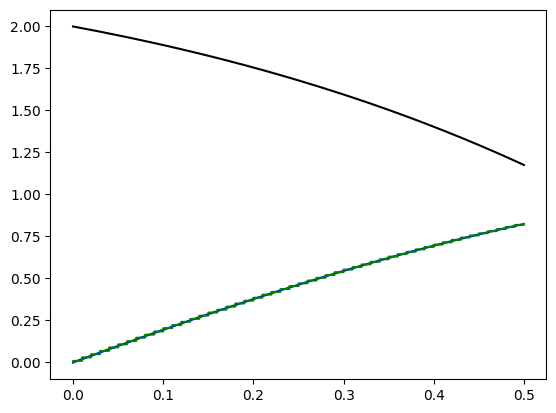

In [ ]:
ys = []
for i in range(len(x_values)):
  ys.append([])
  for j in range(i+1):
    ys[i].append(y_values[j])

obtained_integr_values = [integrate_spline(vals) for vals in ys]
plt.plot(x_values, [actual_integral(l,i) for i in x_values], 'blue')
plt.plot(x_values, y_values, 'black')
plt.plot(x_values, obtained_integr_values, 'green')